In [1]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd  # show current path 

Mounted at /content/gdrive
/content


In [2]:
%cd "/content/gdrive/MyDrive/ClasesMachineLearning"
!ls  # show current directory

/content/gdrive/MyDrive/ClasesMachineLearning
Arboles.ipynb		iris.data	 Semana3.ipynb	       Valhalla23.csv
brain_stroke.csv	MR2.ipynb	 Ses03_Practice.ipynb  wine.data
ChallengeSemana2.ipynb	PlayDataset.csv  Untitled	       wine.names


In [96]:
import numpy as np
from random import randrange
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sn


In [97]:
df = pd.read_csv('brain_stroke.csv') # Leer dataset 
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [98]:
df['gender'] = df['gender'].map({'Male':0,'Female':1}) #Transformamos la información del género a 1 y 0
df['ever_married'] = df['ever_married'].map({'Yes':0,'No':1}) # Hacemos lo mismo con la info de casamientto
fSmoked = []
nSmoked = []
smokes = []
unknown = []

for i in df.values:
  if i[9] == "formerly smoked":
    fSmoked.append(1)
  else:
    fSmoked.append(0)
  if i[9] == "never smoked":
    nSmoked.append(1)
  else:
    nSmoked.append(0)
  if i[9] == "smokes":
    smokes.append(1)
  else:
    smokes.append(0)
  if i[9] == "Unknown":
    unknown.append(1)
  else:
    unknown.append(0)

df['fSmoked'] = fSmoked
df['nSmoked'] = nSmoked
df['smokes'] = smokes
df['sUnknown'] = unknown
#Transformamos las variables de fumador en variables dummy con 1 y 0 cada una
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,fSmoked,nSmoked,smokes,sUnknown
0,0,67.0,0,1,0,Private,Urban,228.69,36.6,formerly smoked,1,1,0,0,0
1,0,80.0,0,1,0,Private,Rural,105.92,32.5,never smoked,1,0,1,0,0
2,1,49.0,0,0,0,Private,Urban,171.23,34.4,smokes,1,0,0,1,0
3,1,79.0,1,0,0,Self-employed,Rural,174.12,24.0,never smoked,1,0,1,0,0
4,0,81.0,0,0,0,Private,Urban,186.21,29.0,formerly smoked,1,1,0,0,0


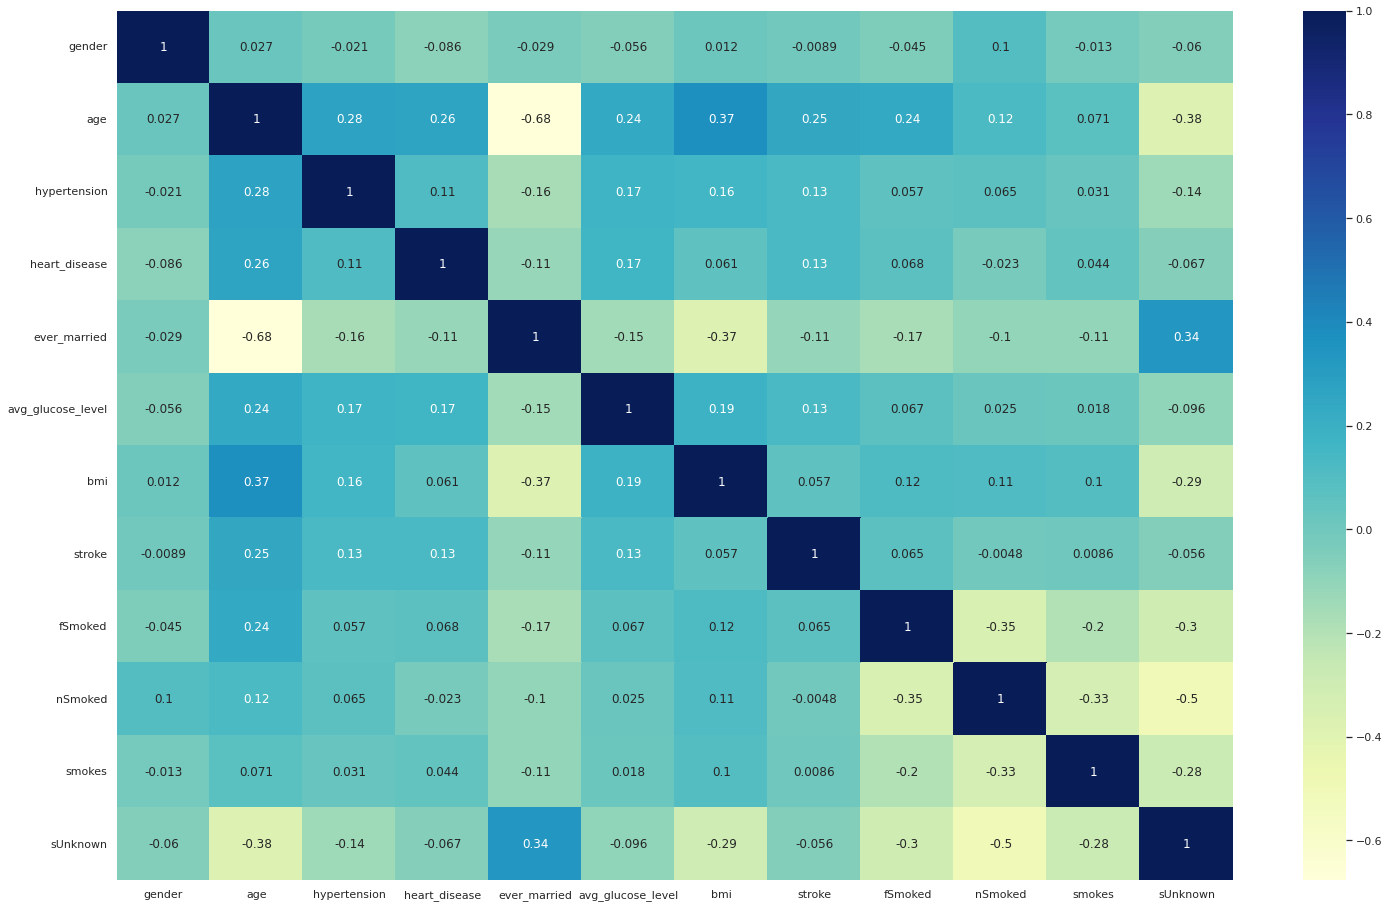

In [99]:
sn.set(rc = {'figure.figsize':(25,16)})
sn.heatmap(df.corr(), annot=True, cmap= 'YlGnBu') # Revisar correlación de variables para decidir cuales entraran al modelo

In [100]:
df = df.drop(["work_type", "smoking_status"], axis=1)
df['Residence_type'] = df['Residence_type'].map({'Rural':0,'Urban':1})
df.head() # Eliminamos algunas columnas y cambiamos el tipo de residencia a 1 y 0

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,fSmoked,nSmoked,smokes,sUnknown
0,0,67.0,0,1,0,1,228.69,36.6,1,1,0,0,0
1,0,80.0,0,1,0,0,105.92,32.5,1,0,1,0,0
2,1,49.0,0,0,0,1,171.23,34.4,1,0,0,1,0
3,1,79.0,1,0,0,0,174.12,24.0,1,0,1,0,0
4,0,81.0,0,0,0,1,186.21,29.0,1,1,0,0,0


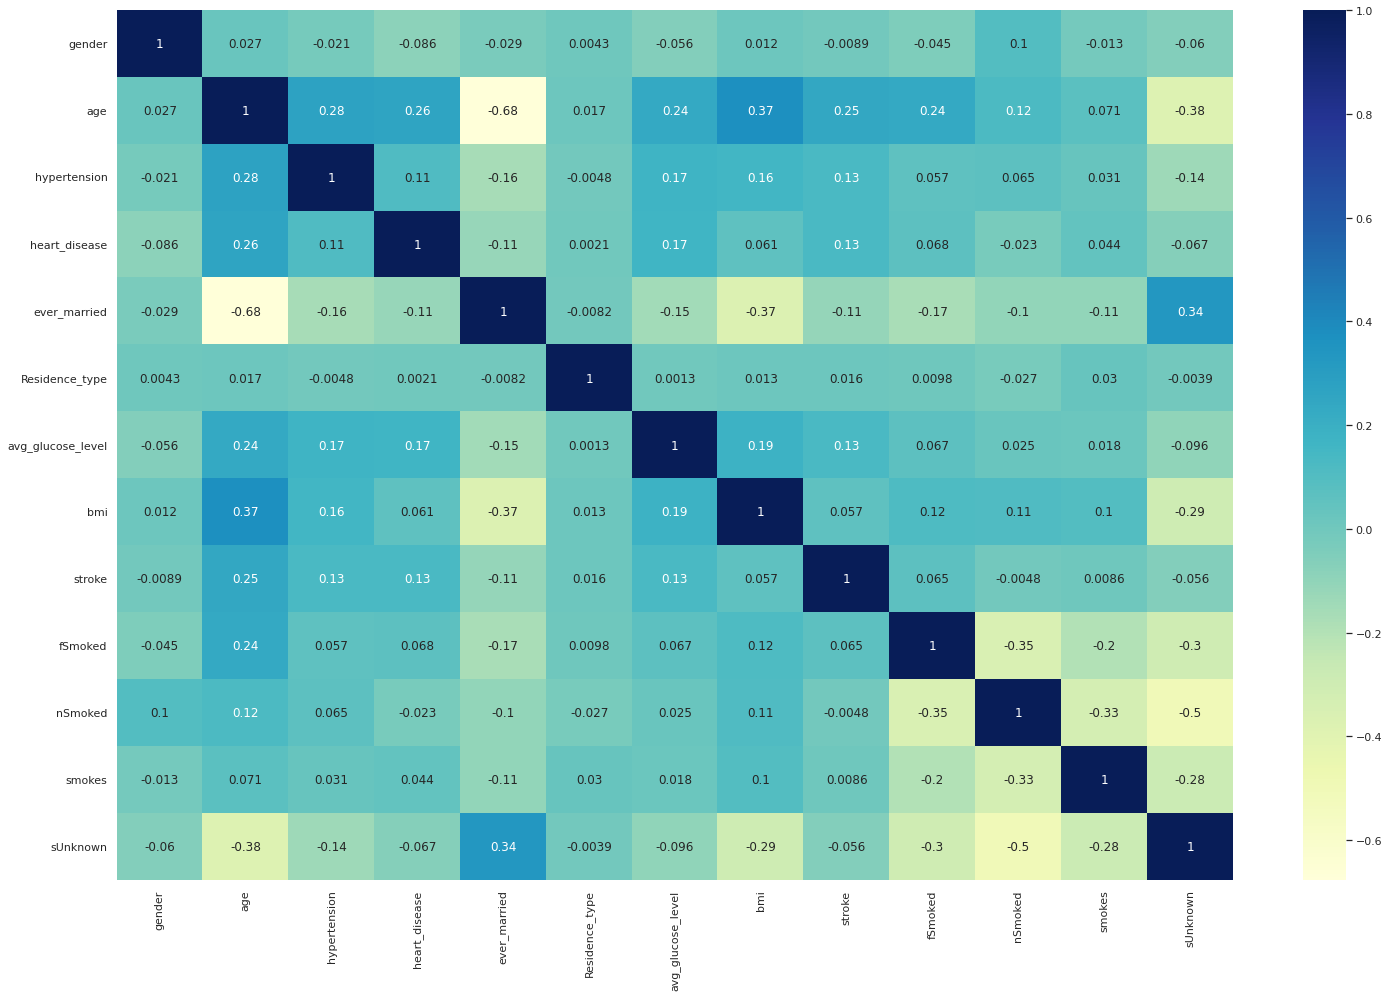

In [101]:
sn.set(rc = {'figure.figsize':(25,16)})
sn.heatmap(df.corr(), annot=True, cmap= 'YlGnBu') #Visualizamos la correlación de las nuevas variables

In [102]:
df = df.drop(["gender", "Residence_type","avg_glucose_level","nSmoked","smokes","sUnknown","bmi","fSmoked","ever_married"], axis=1)
df.head() #Eliminamos todas las variables que no influyen en nuestro resultado

,age,hypertension,heart_disease,stroke
0,67.0,0,1,1
1,80.0,0,1,1
2,49.0,0,0,1
3,79.0,1,0,1
4,81.0,0,0,1


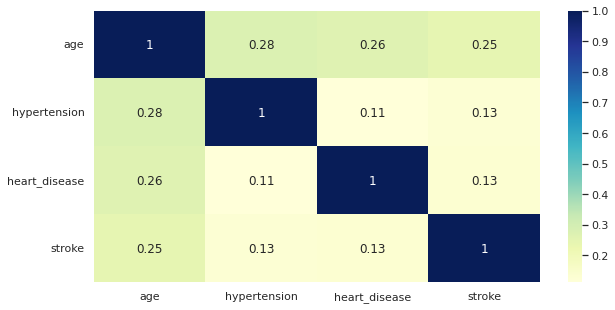

In [103]:
sn.set(rc = {'figure.figsize':(10,5)})
sn.heatmap(df.corr(), annot=True, cmap= 'YlGnBu') # Visualizamos solo las variables utiles

In [104]:
df_x = df.drop(["stroke"],axis=1).values
df_y = df["stroke"].values
print(len(df_x)) #Separamos nuestra información de entrada y salida de nuestro modelo

4981


In [105]:
train_y = []
train_x = []
validate_y = []
validate_x = []
for i in range(0,2988):
  value = randrange(0,len(df_y))
  train_y.append(df_y[value])
  train_x.append(df_x[value])
  df_y = np.concatenate((df_y[:value],df_y[value+1:]))
  df_x = np.concatenate((df_x[:value],df_x[value+1:]))
aux_y = df_y
aux_x = df_x
for i in range(0,997):
  value = randrange(0,len(aux_y))
  validate_y.append(aux_y[value])
  validate_x.append(aux_x[value])
  aux_y = np.concatenate((aux_y[:value],aux_y[value+1:]))
  aux_x = np.concatenate((aux_x[:value],aux_x[value+1:]))
train_x = aux_x
train_y = aux_y
#Aleatoriamente tomamos 4000 valores de nuestros datos para entrenar y dejamos los otros 981 para validar

In [106]:
h   = lambda x,theta: 1 / (1+math.exp(-(theta[0]+theta[1]*x[0]+theta[2]*x[1]+theta[3]*x[2])))
j_i = lambda x,y,theta: y*math.log(h(x,theta)) + (1-y)*math.log(1-h(x,theta)) #Creamos nuestra función h y nuestra función de costo

In [115]:
theta = [1,1,1,1] #Cambia dependiendo del orden del modelo (1 theta para cada dimensión de nuestros datos + 1)
alpha = 5
n = len(train_y)
print(theta) #Realizamos 2000 iteraciones con un alpha de 10
for idx in range(5000):
  acumDelta0 = []
  acumDelta1 = []
  acumDelta2 = []
  acumDelta3 = []
  for x_i, y_i in zip(train_x,train_y):
    acumDelta0.append(h(x_i,theta)-y_i)
    acumDelta1.append((h(x_i,theta)-y_i)*x_i[0])
    acumDelta2.append((h(x_i,theta)-y_i)*x_i[1])
    acumDelta3.append((h(x_i,theta)-y_i)*x_i[2])
  sJt0 = sum(acumDelta0)
  sJt1 = sum(acumDelta1)
  sJt1 = sum(acumDelta2)
  sJt1 = sum(acumDelta3)
  theta[0] = theta[0] - (alpha/n)*sJt0
  theta[1] = theta[1] - ((alpha/n)*sJt1)
  theta[2] = theta[2] - ((alpha/n)*sJt1)
  theta[3] = theta[3] - ((alpha/n)*sJt1)
print(theta)

[1, 1, 1, 1]
[-13.951160875022437, 0.16603206871999332, 0.16603206871999332, 0.16603206871999332]


In [116]:
n_train = len(train_y)
n_validate = len(validate_y)

#Validación
acumDelta = []
for x_i, y_i in zip(validate_x,validate_y):
    acumDelta.append(j_i(x_i,y_i,theta))

sDelta = sum(acumDelta)
j_validate = 1/(2*n_validate)*sDelta

print("Error de validación: ",j_validate)

#Training
acumDelta = []
for x_i, y_i in zip(train_x,train_y):
    acumDelta.append(j_i(x_i,y_i,theta))

sDelta = sum(acumDelta)
j_train = 1/(2*n_train)*sDelta

print("Error de entrenamiento: ",j_train)
print(theta)
#Obtenemos el error el cual es muy pequeño

Error de validación:  -0.07573165179252107
Error de entrenamiento:  -0.08814666008727653
[-13.951160875022437, 0.16603206871999332, 0.16603206871999332, 0.16603206871999332]


In [117]:
print(df)

       age  hypertension  heart_disease  stroke
0     67.0             0              1       1
1     80.0             0              1       1
2     49.0             0              0       1
3     79.0             1              0       1
4     81.0             0              0       1
...    ...           ...            ...     ...
4976  41.0             0              0       0
4977  40.0             0              0       0
4978  45.0             1              0       0
4979  40.0             0              0       0
4980  80.0             1              0       0

[4981 rows x 4 columns]


In [118]:
def predict(x,expected):
  res = h(x,theta)
  exp = 0
  #if (expected==1):print(res,expected)
  if res<0.5:
    exp =  0
  else:
    exp = 1
  if exp == expected:
    return 1
  else:
    return 0


#Creamos una función que de acuerdo al resultado de nuestro modelo pueda predecir un resultado, compararlo con nuestro resultado esperado
#Y retornar si el modelo predijo bien o no, si predice bien retorna 1 y si predice mal retorna 0

#Para redondear, ya que queremos resultados de 1 y 0, si el valor es menor a 0.5, asumimos un 0 y si es mayor a 0.5 asumimos un 1


def predictMC(x,expected):
  res = h(x,theta)
  exp = 0
  if res<0.5:
    exp =  0
  else:
    exp = 1
  if exp == 1:
    if expected ==1:
      return "VP"
    else:
      return "FP"
  else:
    if expected ==0:
      return "VN"
    else:
      return "FN"


# Creamos la función predictMc, que nos permite saber si el valor actual devuelve un Verdadero positivo, un Falso positivo, Un verdadero negativo o un falso negativo


In [119]:
valid_y = validate_y
valid_x = validate_x
good = 0
bad = 0
l = 981
mC = [[0,0],[0,0]]
for i in range(0,981):
  n = randrange(0,len(valid_y))
  mcValue = predictMC(valid_x[n],valid_y[n])
  if mcValue == "VP": mC[0][0]+= 1
  if mcValue == "FP": mC[0][1]+= 1
  if mcValue == "FN": mC[1][0]+= 1
  if mcValue == "VN": mC[1][1]+= 1
  if predict(valid_x[n],valid_y[n]) == 1:
    good+=1
  else:
    bad+=1
  valid_x = np.concatenate((valid_x[:n],valid_x[n+1:]))
  valid_y = np.concatenate((valid_y[:n],valid_y[n+1:]))
  l-=1
print(good,bad)
print(mC)
# Aleatoriamente seleccionamos 100 valores de nuestra muestra de validación y los metemos al modelo para saber cuantas 
# veces predice correctamente y cuantas se equivoca

935 46
[[0, 0], [46, 935]]


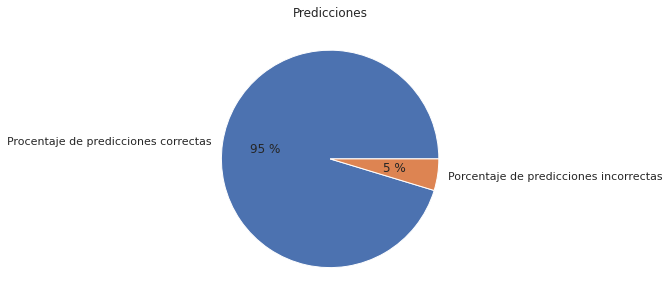

In [120]:
efectividad = [good, bad]
titulo = ["Procentaje de predicciones correctas", "Porcentaje de predicciones incorrectas"]
plt.title("Predicciones")
plt.pie(efectividad, labels=titulo, autopct="%0.0f %%")
plt.show()
#Graficamos el porcentaje de aciertos de nuestro modelo y podemos visualizar que es un buen número

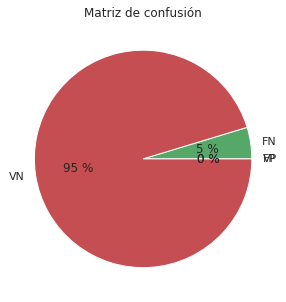

In [121]:
mcData = [mC[0][0], mC[0][1],mC[1][0],mC[1][1]]
titulo = ["VP", "FP","FN","VN"]
plt.title("Matriz de confusión")
plt.pie(mcData, labels=titulo, autopct="%0.0f %%")
plt.show()